# Marketing and Customer Analytics

The recent marketing campaigns of a company have not been as effective as they were expected to be.  
So, this project is about the analysis of the marketing dataset to understand the reasons and proposing data-driven solutions.

The dataset is available at the link: https://www.kaggle.com/jackdaoud/marketing-data

## Importing Libraries

In [1]:
# Importing required libraries
import numpy as np                      # Linear algebra
import scipy                            # Statistics
import pandas as pd                     # Data processing
import matplotlib.pyplot as plt         # Graphs visualization
%matplotlib inline
import seaborn as sns                   # Statistical plots visualization

In [2]:
# Turning off warnings
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [3]:
# Importing dataset
df = pd.read_csv("marketing_data.csv")

In [4]:
# View the dataset 
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/2013,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/2013,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/2012,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/2012,99,267,...,10,3,0,0,0,0,0,0,0,IND


### Description of the features
- **ID:-** Customer's Unique Identification
- **Year_Birth:-** Customer's Birth Year
- **Education:-** Customer's education level
- **Marital_Status:-** Customer's marital status
- **Income:-** Customer's yearly household income
- **Kidhome:-** Number of children in customer's household
- **Teenhome:-** Number of teenagers in customer's household
- **Dt_Customer:-** Date of customer's enrollment with the company
- **Recency:-** Number of days since customer's last purchase
- **MntWines:-** Amount spent on wine in the last 2 years
- **MntFruits:-** Amount spent on fruits in the last 2 years
- **MntMeatProducts:-** Amount spent on meat in the last 2 years
- **MntFishProducts:-** Amount spent on fish in the last 2 years
- **MntSweetProducts:-** Amount spent on sweets in the last 2 years
- **MntGoldProds:-** Amount spent on gold in the last 2 years
- **NumDealsPurchases:-** Number of purchases made with a discount
- **NumWebPurchases:-** Number of purchases made through the company's web site
- **NumCatalogPurchases:-** Number of purchases made using a catalogue
- **NumStorePurchases:-** Number of purchases made directly in stores
- **NumWebVisitsMonth:-** Number of visits to company's web site in the last month
- **AcceptedCmp1:-** Performance of the 1st campaign  
     1 if customer accepted the offer in the 1st campaign, 0 otherwise 
- **AcceptedCmp2:-** Performance of the 2nd campaign  
     1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:-** Performance of the 3rd campaign  
     1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4:-** Performance of the 4th campaign  
     1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5:-** Performance of the 5th campaign  
     1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response:-** Performance of the latest campaign  
     1 if customer accepted the offer in the latest campaign, 0 otherwise (Target variable)
- **Complain:-** Customer complains in the last 2 years  
     1 if customer complained, 0 otherwise
- **Country:-** Customer's location

## Data Wrangling

In [5]:
# View the 5 random entries from the dataset 
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1245,7108,1965,Master,Widow,"$51,390.00",1,1,9/8/2012,54,205,...,5,5,0,0,0,0,0,0,0,SA
196,3009,1962,PhD,Widow,"$71,670.00",0,0,7/9/2013,8,1462,...,6,6,0,1,1,0,1,1,0,SP
857,6516,1989,Basic,Married,"$17,487.00",1,0,3/18/2013,37,0,...,2,7,0,0,0,0,0,0,0,AUS
722,5236,1979,Graduation,Together,"$77,568.00",0,1,8/25/2012,30,1230,...,8,5,0,1,1,1,0,0,0,SP
1082,3852,1961,Master,Together,"$74,881.00",1,1,3/8/2013,48,505,...,12,5,0,0,0,0,0,0,0,IND


In [6]:
# Description of the dataset
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Shape of the dataset
df.shape

(2240, 28)

## Cleaning the Dataset

In [8]:
# Cleaning up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

In [9]:
# Transform Income column to a numerical
df["Income"] = df["Income"].str.replace('$', '')
df["Income"] = df["Income"].str.replace(",", "").astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Exploratory Data Analysis

### **1. Identifying the featues that contains null values**

In [11]:
# Checking for the null values
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Count'>

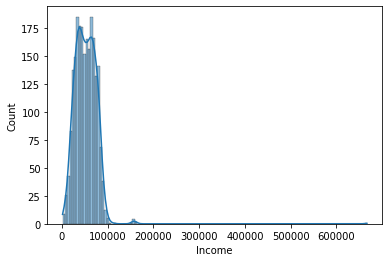

In [12]:
# Plotting 'Income' to get an idea of distribution
sns.histplot(df['Income'],kde = 20)

<AxesSubplot:title={'center':'Income'}, xlabel='Income'>

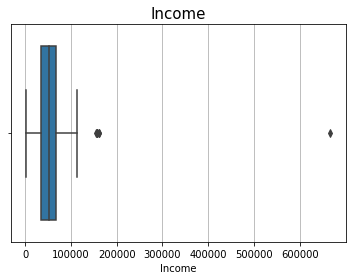

In [13]:
# Plotting the boxplot 'Income' to check for outlier in Income
plt.grid()
plt.title('Income',size=15)
sns.boxplot(df['Income'])

**Observations about the income:-**
- Income contains 24 null values.
- It is distributed between \\$0 - \\$100,000 and has some outliers.
- There are varied range of customers in this store. People with income as high as \\$700k yearly income and some customers with less than \\$100k yearly income as well.

Fixing the null values

In [14]:
# Imputing null values with the median value (to avoid skewing of the mean due to outliers)
df['Income']=df['Income'].fillna(df['Income'].median())

In [15]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/2013,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/2012,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,10,3,0,0,0,0,0,0,0,IND


### **2) Identifying the features that contain outliers**

In [16]:
# Creating the dataframe which contains features having outliers
df_outliers = df.drop(columns = ['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include = np.number)

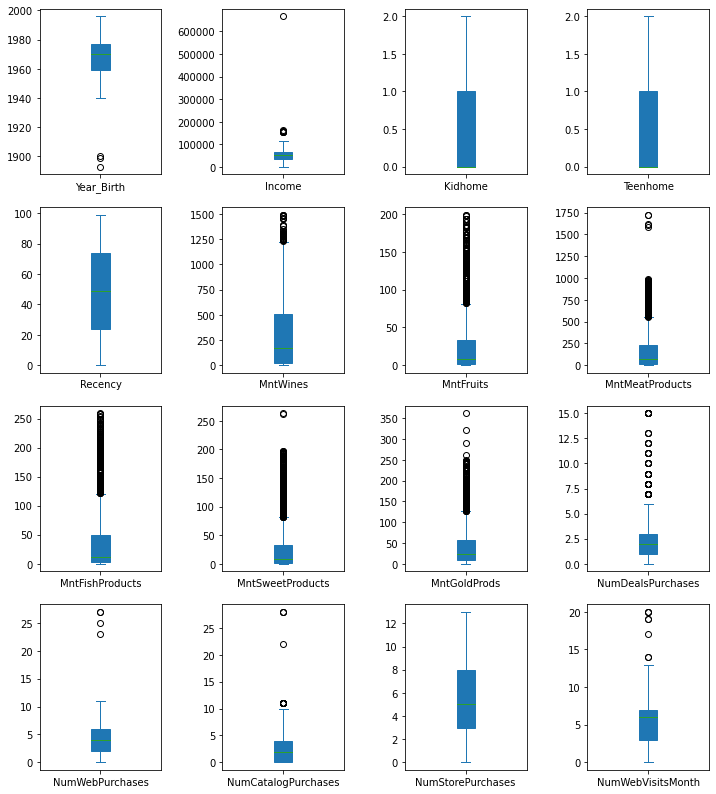

In [17]:
# Plotting the boxplots of the features having outliers
df_outliers.plot(subplots = True, layout = (4,4), kind = 'box', figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace = 0.5)

**Observations about the outliers:-**

- Multiple features contain outliers as show in the boxplots above.
- There are some clear outliers in birth year column i.e., Year_Birth <= 1920 as it's not possible for a customer to have birth year less than 1900.
- There are also some outliers in the income column where the Income is greater than $200,000.

Removing rows where Year_Birth <= 1900

In [18]:
Q1 = df['Year_Birth'].quantile(0.25)        # The lower quartile (Q1) is the value under which 25% of data points are found.
Q3 = df['Year_Birth'].quantile(0.75)        # The upper quartile (Q3) is the value under which 75% of data points are found.
IQR = Q3 - Q1                               # Inter Quantile Range is defined as the difference between the 75th and 25th percentiles of the data.
print("The lower quartile of 'Year_Birth' (Q1):-", Q1)
print("The upper quartile of 'Year_Birth' (Q3):-", Q3)
print("Inter quartile range of 'Year_Birth' (IQR):-", IQR)

The lower quartile of 'Year_Birth' (Q1):- 1959.0
The upper quartile of 'Year_Birth' (Q3):- 1977.0
Inter quartile range of 'Year_Birth' (IQR):- 18.0


In [19]:
# Dropping the upper and lower outliers from the 'Year_Birth' column.
df = df[~((df['Year_Birth'] < (Q1 - 1.5 * IQR)) |(df['Year_Birth'] > (Q3 + 1.5 * IQR)))]

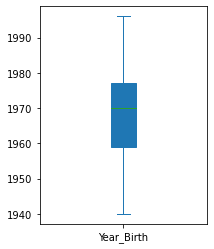

In [20]:
# Plotting the boxplot 'Year_Birth' to check for the removal of outlier.
plt.figure(figsize = (3,4))
df['Year_Birth'].plot(kind = 'box', patch_artist = True);

Removing rows where Income >= $200,000

In [21]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
print("The lower quartile of Income (Q1):-", Q1)
print("The upper quartile of Income (Q3):-", Q3)
print("Inter quartile range of Income (IQR):-", IQR)

The lower quartile of Income (Q1):- 35523.0
The upper quartile of Income (Q3):- 68281.0
Inter quartile range of Income (IQR):- 32758.0


In [22]:
# Dropping the upper and lower outliers from the 'Income' column.
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) |(df['Income'] > (Q3 + 1.5 * IQR)))]

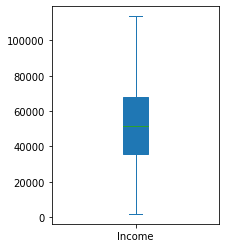

In [23]:
# Plotting the boxplot 'Income' to check for the removal of outlier.
plt.figure(figsize = (3,4))
df['Income'].plot(kind = 'box', patch_artist = True);

### **3) Identifying the features that need transformation**

In [24]:
# Basic information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2229 non-null   int64  
 1   Year_Birth           2229 non-null   int64  
 2   Education            2229 non-null   object 
 3   Marital_Status       2229 non-null   object 
 4   Income               2229 non-null   float64
 5   Kidhome              2229 non-null   int64  
 6   Teenhome             2229 non-null   int64  
 7   Dt_Customer          2229 non-null   object 
 8   Recency              2229 non-null   int64  
 9   MntWines             2229 non-null   int64  
 10  MntFruits            2229 non-null   int64  
 11  MntMeatProducts      2229 non-null   int64  
 12  MntFishProducts      2229 non-null   int64  
 13  MntSweetProducts     2229 non-null   int64  
 14  MntGoldProds         2229 non-null   int64  
 15  NumDealsPurchases    2229 non-null   i

The variable Dt_Customer represents Date of customer's enrollment with the company so this should be in DateTime format.

In [25]:
# Converting datatype of Dt_Customer column to DataTime Format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2229 non-null   int64         
 1   Year_Birth           2229 non-null   int64         
 2   Education            2229 non-null   object        
 3   Marital_Status       2229 non-null   object        
 4   Income               2229 non-null   float64       
 5   Kidhome              2229 non-null   int64         
 6   Teenhome             2229 non-null   int64         
 7   Dt_Customer          2229 non-null   datetime64[ns]
 8   Recency              2229 non-null   int64         
 9   MntWines             2229 non-null   int64         
 10  MntFruits            2229 non-null   int64         
 11  MntMeatProducts      2229 non-null   int64         
 12  MntFishProducts      2229 non-null   int64         
 13  MntSweetProducts     2229 non-nul

### **4) Finding the useful variables that can be engineered with the given data.**

- Replace **birth year of customer (Year_Birth)** with the age of Customer ('Age')

In [27]:
# Age of customer
df.rename(columns = {'Year_Birth':'Age'}, inplace = True)
df['Age'] = df.Age.apply(lambda x: 2021-x)

- **The total number of children ('Children')** can be engineered with the sum of 'Kidhome' and 'Teenhome'

In [28]:
# Performing feature engineering.
df['Children'] = df['Kidhome'] + df['Teenhome']

- Modify **date of enrollment ('Dt_Customer')** to total days since enrollment ('TotalEnrollDays')

In [29]:
# Total number of days since enrollment of a customer with the company.
from datetime import date
df.rename(columns = {'Dt_Customer':'TotalEnrollDays'}, inplace = True)
df['TotalEnrollDays'] = pd.to_datetime(date.today()) - df['TotalEnrollDays']
df['TotalEnrollDays'] = [int(str(df['TotalEnrollDays'][x])[:4]) for x in df.index]

- **The total amount spent ('TotalMnt')** can be engineered from the sum of all features containing the keyword 'Mnt'

In [30]:
# The total amount spend in the last 2 years.
mnt_col = [i for i in df.columns if 'Mnt' in i]
df['TotalMnt'] = df[mnt_col].sum(axis=1)

- **The total purchases ('TotalPurchase')** can be engineered from the sum of all features containing the keyword 'Purchases'

In [31]:
# The total number of purchases made.
purchase_col = [j for j in df.columns if 'Purchase' in j]
df['TotalPurchase'] = df[purchase_col].sum(axis=1)

- **The total number of campaigns accepted ('TotalCampaignsAcc')** can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [32]:
# The total campaigns in which customer accepted the offer.
campaigns_col = [c for c in df.columns if 'Cmp' in c] + ['Response']
df['TotalCampaignsAcc'] = df[campaigns_col].sum(axis=1)

In [33]:
# View the customer ID with new features.
df[['ID', 'Age', 'Children', 'TotalEnrollDays', 'TotalMnt', 'TotalPurchase', 'TotalCampaignsAcc']]

,ID,Age,Children,TotalEnrollDays,TotalMnt,TotalPurchase,TotalCampaignsAcc
0,1826,51,0,2728,1190,15,1
1,1,60,0,2729,577,18,2
2,10476,63,1,2762,251,11,0
3,1386,54,2,2764,11,4,0
4,5371,32,1,2797,91,8,2
...,...,...,...,...,...,...,...
2235,10142,45,1,3194,689,20,0
2236,5263,44,1,3238,55,5,0
2237,22,45,1,3288,309,14,0
2238,528,43,0,3292,1383,20,0


### 5) Plotting the patterns and anomalies in the dataset

We will identify feature correlation to identify the different patterns and anomalies in the dataset. For that, we will use
- the clustermap where dark blue means positive correlation and white represents negative correlation.
- the heatmap where light color means positive correlation and dark color represents negative correlation.
- the lineplots illustrating the correlation of two features.

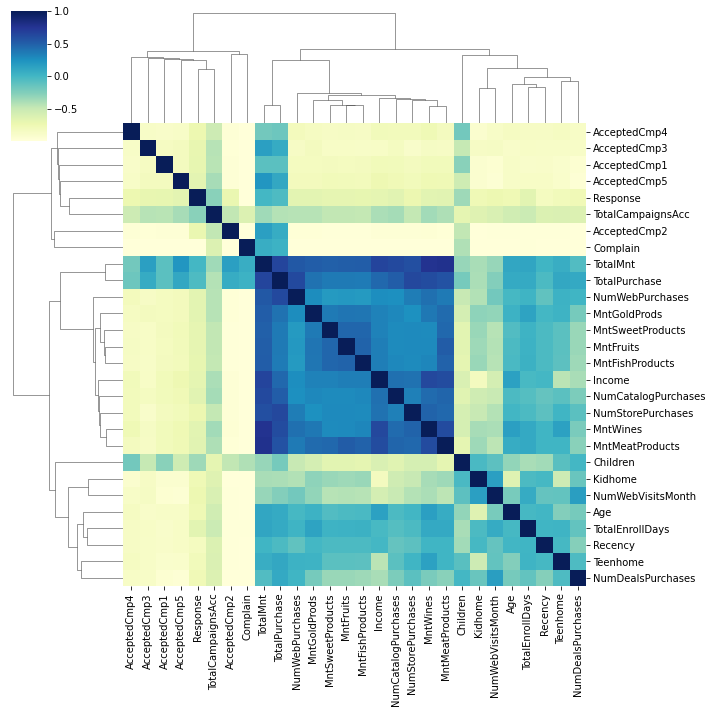

In [34]:
# Plotting clustermap for identify feature correlation.
corrs = df.drop(columns = 'ID').select_dtypes(include = np.number).corr(method = 'kendall')
sns.clustermap(corrs, cmap = "YlGnBu");

**Observations about the clustermap:-**
- **"High Income" cluster:-** The amount spent in the last 2 years ('TotalMnt' and other 'Mnt' features) and the number of purchases made ('TotalPurchases' and other 'NumPurchases' features) are strongly positively correlated with each other and 'Income'.
- **"Advertising Campaigns" cluster:-** Acceptence of advertising campaigns ('AcceptedCmp' and 'Response') are strongly negatively correlated with 'Complain' and Acceptence of advertising campaign 2 ('AcceptedCmp2') and weakly negatively correled with each other. They are positively correlated with total amount spent in the last 2 years ('TotalMnt') and the total number of purchases made ('TotalPurchases').

<AxesSubplot:>

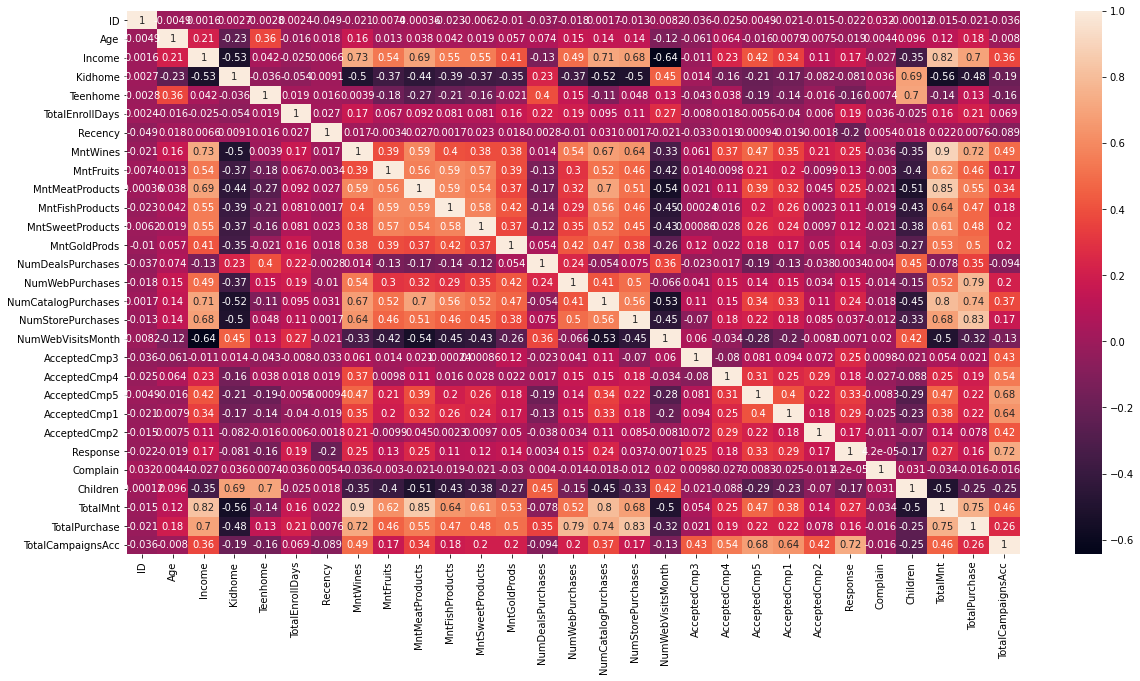

In [35]:
# Plotting heatmap for identify feature correlation.
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True)

**Observations about the heatmap:-**
- **"Income"** has a high positive correlation with "NumPurchases" columns and "Mnt" columns. This represents the High Income cluster and shows people with high income spend more and purchase more frequently. **"Income"** has a high negative correlation with "NumWebVisitsMonth" suggesting that customers with high income do not go for web visits too often.
- **"Amount Spent on Wines"** and **"Amount Spent on Meat products"** has a high positive correlation with "NumCatalogPurchases", suggesting that people generally buy Wines and Meat products through Catalogs.
- **"NumWebVisitsMonth"** shows no correlation with "NumWebPurchases". Instead, it shows a mild correlation with "NumDealsPurchases" which suggests that deals are an effective way of stimulating purchases on the website.

**Plot illustrating the effect of 'Income' on 'TotalMnt':-**  

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 [Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000')])

<Figure size 288x288 with 0 Axes>

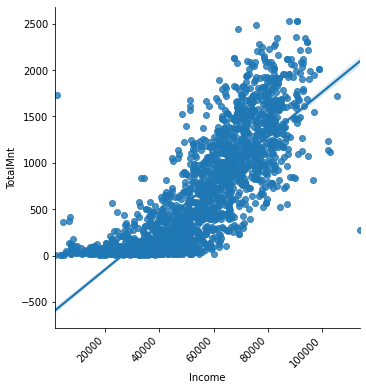

In [36]:
plt.figure(figsize = (4,4))
sns.lmplot(x = 'Income', y = 'TotalMnt', data = df)
plt.xticks(rotation = 45, horizontalalignment = 'right')

Income of customer is strongly positively correlated with the total amount spent.

**Plot illustrating the effect of 'Children' on 'Total mnt':-**

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0')])

<Figure size 288x288 with 0 Axes>

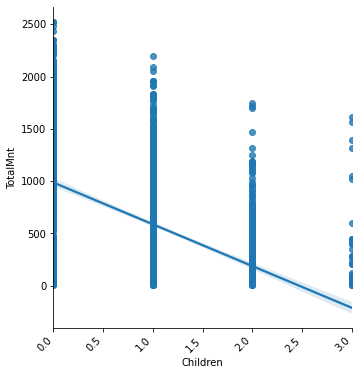

In [37]:
plt.figure(figsize=(4,4))
sns.lmplot(x='Children', y='TotalMnt', data=df)
plt.xticks(rotation=45, horizontalalignment='right')

Having children (number of kids and teens) is negatively correlated with the total amount spent.

**Plot illustrating the effect of 'Children' on 'NumDealsPurchases':-**

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0')])

<Figure size 288x288 with 0 Axes>

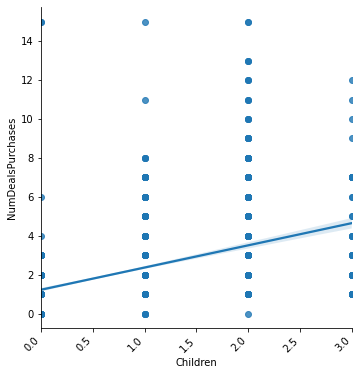

In [38]:
plt.figure(figsize = (4,4))
sns.lmplot(x = 'Children', y = 'NumDealsPurchases', data = df)
plt.xticks(rotation = 45, horizontalalignment = 'right')

Having children (number of kids and teens) is positively correlated with the number of deals purchased.

**Plots illustrating the effect of 'TotalCampaignsAcc' on 'Income':-**

(array([0., 1., 2., 3., 4., 5.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5')])

<Figure size 288x288 with 0 Axes>

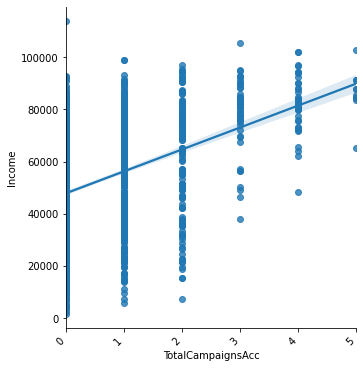

In [39]:
plt.figure(figsize = (4,4))
sns.lmplot(x = 'TotalCampaignsAcc', y = 'Income', data = df)
plt.xticks(rotation = 45, horizontalalignment = 'right')

Total number of campaigns accepted is positively correlated with the income.

**Plots illustrating the effect of 'TotalCampaignsAcc' on 'Children':-**

(array([0., 1., 2., 3., 4., 5.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5')])

<Figure size 288x288 with 0 Axes>

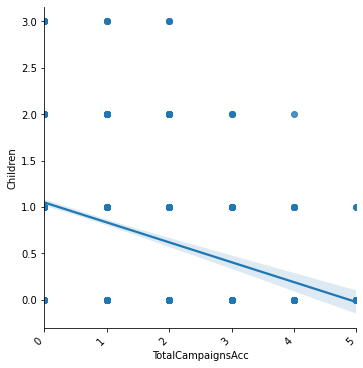

In [40]:
plt.figure(figsize = (4,4))
sns.lmplot(x = 'TotalCampaignsAcc', y = 'Children', data = df)
plt.xticks(rotation = 45, horizontalalignment = 'right')

Total number of campaigns accepted is negatively correlated with having children (number of kids and teens)

**Plots illustrating the effect of 'NumWebVisitsMonth' on 'NumWebPurchases':-**

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0')])

<Figure size 288x288 with 0 Axes>

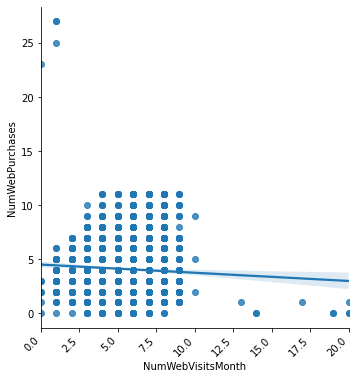

In [41]:
plt.figure(figsize = (4,4))
sns.lmplot(x = 'NumWebVisitsMonth', y = 'NumWebPurchases', data = df)
plt.xticks(rotation = 45, horizontalalignment = 'right')

**Plots illustrating the effect of 'NumWebVisitsMonth' on 'NumDealsPurchases':-**

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0')])

<Figure size 288x288 with 0 Axes>

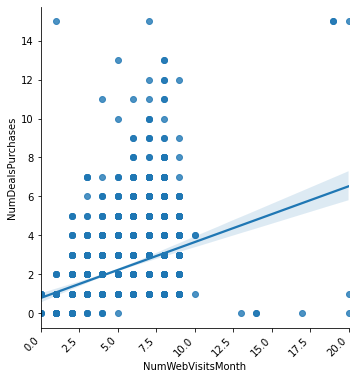

In [42]:
plt.figure(figsize = (4,4))
sns.lmplot(x = 'NumWebVisitsMonth', y = 'NumDealsPurchases', data = df)
plt.xticks(rotation = 45, horizontalalignment = 'right')

**Anomalies:**
- The number of website visits in the last month ('NumWebVisitsMonth') does not positively correlate with the number of web purchases ('NumWebPurchases').
- Instead, 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), suggeting that deals are effective way of stimulating purchase on the website.

## Statistical Analysis

### 1) Factors that are significantly related to the number of store purchases

In [43]:
# Creating DataFrame depicting correlation of number of store purchases with other features
store_purchase = pd.DataFrame(df.corr()['NumStorePurchases'])
store_purchase = store_purchase.drop(['NumStorePurchases','ID'])

# Keeping all the positive and negative correlations of number of store purchases
store_purchase = store_purchase[(store_purchase.NumStorePurchases > 0.5) | (store_purchase.NumStorePurchases < -0.3)]

# Sorting the correlation values in ascending order
store_purchase = store_purchase.sort_values(by = ['NumStorePurchases'])

Text(0.5, 1.0, 'Significant Correlation for NumStorePurchases')

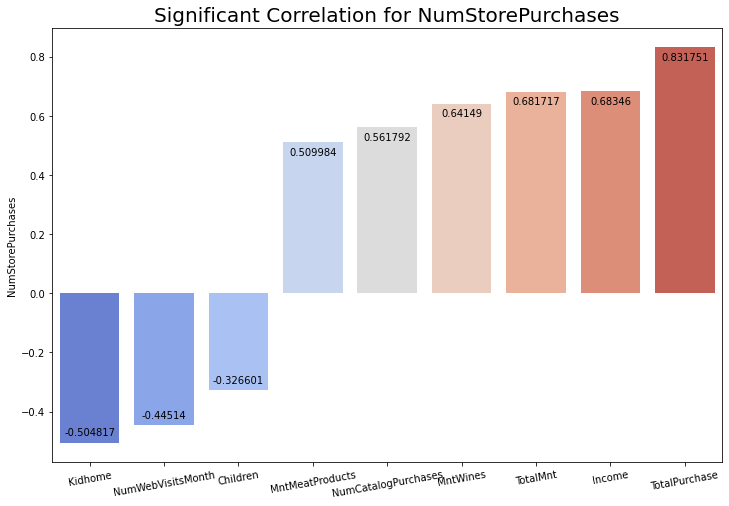

In [44]:
# Visualizing the positive and negative correlations of number of store purchases
plt.figure(figsize = (12, 8))
a = store_purchase.index
b = store_purchase.NumStorePurchases
ax = sns.barplot(x = a, y = b, palette = 'coolwarm')
plt.bar_label(ax.containers[0], padding = -15)
plt.xticks(rotation = 10)
plt.title("Significant Correlation for NumStorePurchases", fontsize = '20')

**Number of store purchases ('NumStorePurchases') has a positive relation with:-**

- **Amount spent on wine ('MntWines'):** One probable explanation for this is because the customer wishes to evaluate the various wines available in the store. A Siccording to government regulations, wine products are typically not authorised to be promoted. A customer may wish to test a different brand.The second reason for this being feasible is due to shop regulations requires verifying the customers identification. While ordering items online, a teenager might simply conceal himself or herself.
- **Income:** One probable explanation is that low-income customers, as opposed to those with greater income, tend to buy in bulk to take advantage of discounts. When a product is purchased in quantity, the need to go to the store is reduced.
- **Total Purchase:** One probable explanation is that customers are more likely to buy more when a variety of things are displayed in front of them, which may be the case when they go to the store. In addition, the salesman can persuade customers to purchase additional products, which is impossible to do while shopping online.
- Other factors include amount spent on meat, number of catalog purchases and total amount spend.

**Number of store purchases ('NumStorePurchases') has a negative relation with:-**

- **Number of children at home, especially kids:** One plaussible explanation could be that kids are difficult to handle in stores, so parents prefer to buy everything at once. If parents are at home with their children, they may prefer to look at other channels such as a website.
- **Number of website visits per month:** It is self-evident that if one purchases a thing online, the necessity to visit a store is reduced. Due to the ease of not having to physically go to the store, a larger number of visits to a website may persuade a user to purchase online. 

### 2) Evaluating the performance of India than the Rest of the World in terms of total purchases 

In [45]:
# Calculating the total purchases of all countries in terms of total purchases
total_purchase = df.groupby('Country').agg(np.sum).filter(regex = 'TotalPurchase')

# Calculating the total number of customers of these countries
total_purchase['Customers'] = df['Country'].value_counts()

# Calculating the purchase per person of these countries
total_purchase['PurchasePerPerson'] = round(total_purchase['TotalPurchase']/total_purchase['Customers'], 2)

# Sorting the total purchase in ascending order
total_purchase = total_purchase.sort_values(by=['TotalPurchase'])
total_purchase

,TotalPurchase,Customers,PurchasePerPerson
Country,,,
ME,59,3,19.67
US,1717,108,15.90
GER,1788,120,14.90
IND,2056,146,14.08
AUS,2314,160,14.46
CA,4101,267,15.36
SA,5074,334,15.19
SP,16034,1091,14.70


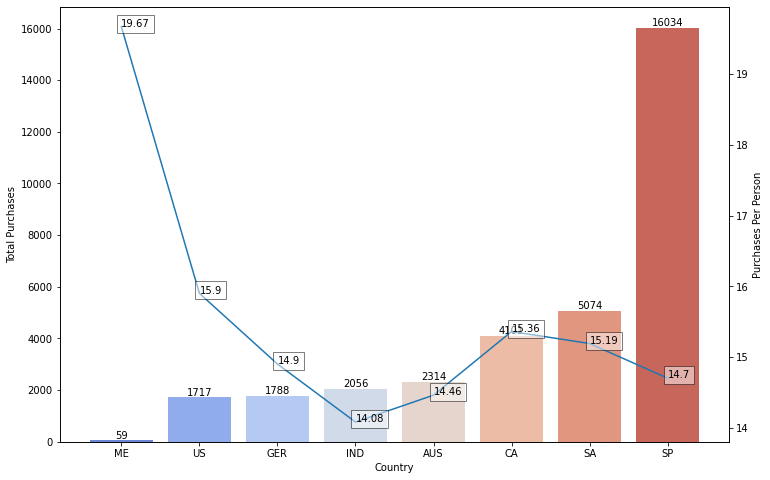

In [46]:
# Visualizing the total purchase and purchase per person of all countries in terms of total purchase.
plt.figure(figsize = (12,8))
y1 = sns.barplot(x = total_purchase.index, y = total_purchase.TotalPurchase, palette = 'coolwarm')
plt.bar_label(y1.containers[0], padding = 0)
y1.set_ylabel('Total Purchases')
y2 = y1.twinx()
y2 = sns.lineplot(x = total_purchase.index, y = total_purchase.PurchasePerPerson)
y2.set_ylabel('Purchases Per Person')
for i in range(8):
    plt.text(i, total_purchase['PurchasePerPerson'][i], total_purchase['PurchasePerPerson'][i], bbox = dict(facecolor = 'white', alpha = 0.5))

India does not appear to be in a strong position in terms of overall number of purchases. It is, in fact, the fourth lowest country in terms of total purchase and lowest in terms of purchases per person. Here, marketing campaigns may be conducted to observe if they converge to SP levels as the number of customers grows or if they stabilize, resulting in increased revenues.

**Null Hypothesis test**

- **Null Hypothesis:** Total purchase made by India is equal to the average of total purchase made by rest of the world in terms of total purchases. (India_total_purchase = Rest_avg_total_purchase)
- **Alternative Hypothesis:** Total purchase made by India differs than the average of total purchase made by rest of the world in terms of total purchases. (India_total_purchase is not equal to Rest_avg_total_purchase)

In [47]:
# Total purchase made by different countries
total_pur = df.groupby('Country')["TotalPurchase"].mean().sort_values()
total_pur = pd.DataFrame(total_pur).reset_index()
total_pur

,Country,TotalPurchase
0,IND,14.082192
1,AUS,14.462500
2,SP,14.696609
3,GER,14.900000
4,SA,15.191617
5,CA,15.359551
6,US,15.898148
7,ME,19.666667


In [48]:
india_pur = total_pur[total_pur['Country'] == 'IND']['TotalPurchase'].mean()
rest_avg = total_pur[total_pur['Country'] != 'IND']['TotalPurchase'].mean()
print("India's total purchase = {}".format(india_pur) )
print("Rest of the world's average no of purchases = {}".format(rest_avg) )

India's total purchase = 14.082191780821917
Rest of the world's average no of purchases = 15.73929867986119


In [49]:
#importing t-test
from scipy.stats import ttest_ind

pval = ttest_ind(df[df['Country'] == 'IND']['TotalPurchase'], df[df['Country'] != 'IND']['TotalPurchase']).pvalue

# Print the p-value for t-test
print("P-value for t-test: ", round(pval, 3))

P-value for t-test:  0.197


Since p-value is much greater than alpha = 0.05, we fail to reject the null hypothesis. So, we can conclude that the total purchase made by India is equal to the average of total purchase made by rest of the world in terms of total purchases.

### 3) Checking whether customers who spent an above average amount on gold in the last 2 years would have more in store purchases.

**Plot illustrating the effect of 'MntGoldProds' on 'NumStorePurchases':-**

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400')])

<Figure size 288x288 with 0 Axes>

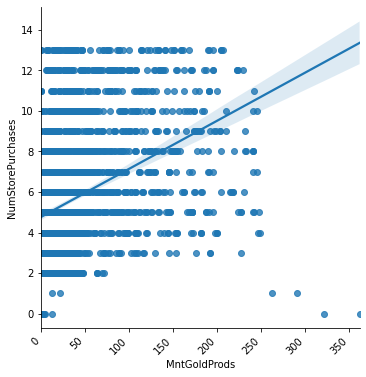

In [50]:
plt.figure(figsize = (4,4))
sns.lmplot(x = 'MntGoldProds', y = 'NumStorePurchases', data = df)
plt.xticks(rotation = 45, horizontalalignment = 'right')

The amount spent on gold in the last 2 years is positively correlated with the number of in store purchases.

**Performing Kendall Correlation Analysis (non parametric test since 'MntGoldProds' is not normally distributed and contains outliers) to test whether the effect is statistically significant:-**

In [51]:
gold_purchase = df.loc[:, ['NumStorePurchases','MntGoldProds']]

# Above average amount on gold spent in absolute terms
gold_purchase = gold_purchase[gold_purchase['MntGoldProds'] > gold_purchase['MntGoldProds'].mean()] 

In [52]:
# importing Kendalltau
from scipy.stats import kendalltau

# Employing Kendalltau Correlation
kendall_corr = kendalltau(x = gold_purchase['MntGoldProds'], y = gold_purchase['NumStorePurchases'])

# Printing correlation results
print('Kendall correlation (tau) =', kendall_corr.correlation)
print('Kendall p-value =', kendall_corr.pvalue)

Kendall correlation (tau) = 0.04632027907329983
Kendall p-value = 0.08201953458084307


The correlation is 0.04632027907329983 with pvalue equal to 0.08201953458084307. Hence, we conclude there is **no correlation** between people who spent an above average amount on gold in the last 2 years and in store purchases.

### 4) Checking whether "Married PhD candidates" have a significant relation with the amount spent on fish.

In [53]:
fish_purchase = df.loc[:, ['Education', 'Marital_Status', 'MntFishProducts']]

# Calculating the amount spent on fish as a percentage of income
fish_purchase['FishPerIncome'] = round((fish_purchase['MntFishProducts'] * 100) / df['Income'], 2)

# Calculating the amount spent by PhD candidates on fish products
fish_purchase = fish_purchase.groupby(['Marital_Status', 'Education']).agg(np.mean)
fish_purchase = fish_purchase.reset_index()
phd = fish_purchase[fish_purchase['Education'] == 'PhD']

# Sorting the amount spent on fish products in ascending order
phd = phd.sort_values(by = ['MntFishProducts'])
phd

,Marital_Status,Education,MntFishProducts,FishPerIncome
4,Alone,PhD,4.000000,0.010000
30,YOLO,PhD,4.000000,0.010000
24,Together,PhD,22.669565,0.033913
19,Single,PhD,24.663265,0.038878
14,Married,PhD,27.343915,0.040529
9,Divorced,PhD,34.500000,0.058269
29,Widow,PhD,36.125000,0.052500


**Comparing the amount spent on Fish Products ('MntFishProducts') between Married PhD candidates and other PhD candidates:-**

Text(0, 0.5, 'Amount spent on fish as a percentage of Income')

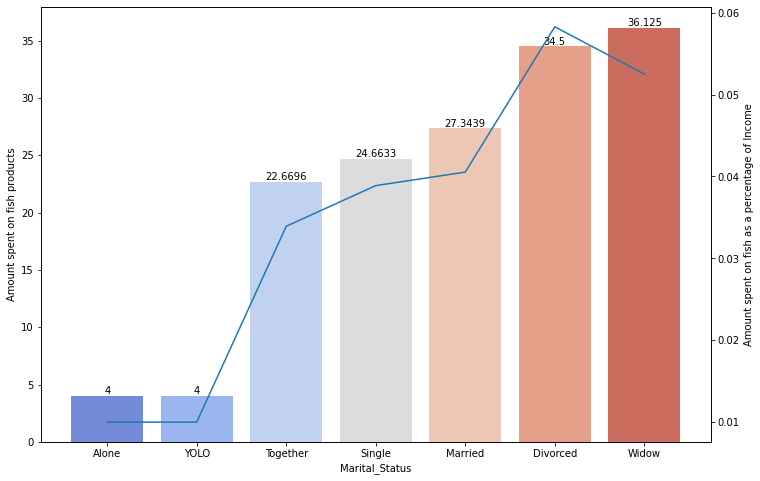

In [54]:
plt.figure(figsize = (12, 8))
y_ax1 = sns.barplot(x = phd.Marital_Status, y = phd.MntFishProducts, palette = 'coolwarm')
plt.bar_label(y_ax1.containers[0], padding = 0)
y_ax1.set_ylabel('Amount spent on fish products')
y_ax2 = y_ax1.twinx()
y_ax2 = sns.lineplot(x = phd.Marital_Status, y = phd.FishPerIncome)
y_ax2.set_ylabel('Amount spent on fish as a percentage of Income')

Since, Married PhD candidates spend the third highest amount or percentage of their income on fish among all the PhD candidates but they do not spent significant amount as per percent of their income.

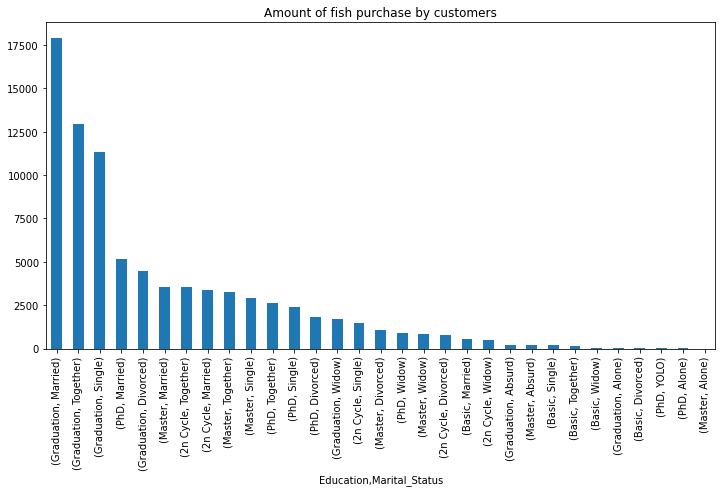

In [55]:
# Visualizing the amount of fish purchasedc by the customers
plt.figure(figsize=(12, 6))
df.groupby(["Education",'Marital_Status'])['MntFishProducts'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Amount of fish purchase by customers');

From the graph, we can observe that Married PhD customers does not have a significant relationship with the amount spent on fish.

### Other factors significantly related to amount spent on fish

In [56]:
# Creating DataFrame depicting correlation of number of store purchases with other features
fish_purchase_df = pd.DataFrame(df.corr()['MntFishProducts'])
fish_purchase_df = fish_purchase_df.drop(['MntFishProducts','ID'])

# Keeping all the positive and negative correlations of number of store purchases
fish_purchase_df = fish_purchase_df[(fish_purchase_df.MntFishProducts > 0.5) | (fish_purchase_df.MntFishProducts < -0.3)]

# Sorting the correlation values in ascending order
fish_purchase_df = fish_purchase_df.sort_values(by = ['MntFishProducts'])

Text(0.5, 1.0, 'Significant Correlation for Amount spent on MntFishProducts')

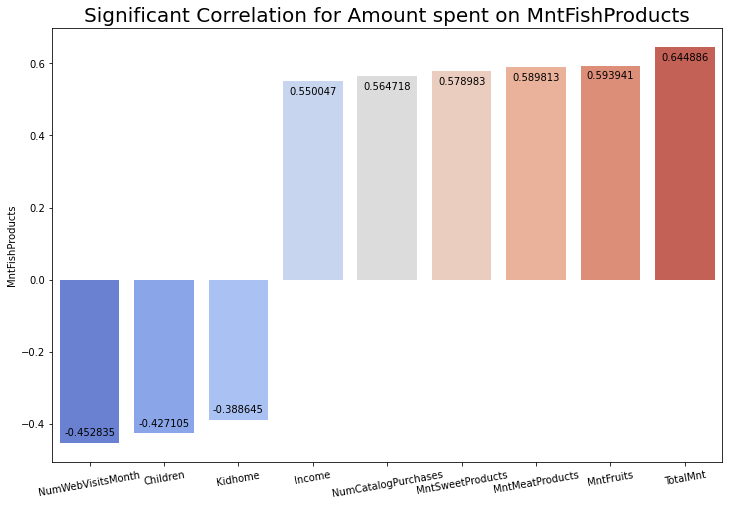

In [57]:
# Visualizing the positive and negative correlations of number of store purchases
plt.figure(figsize = (12, 8))
ax = sns.barplot(x = fish_purchase_df.index, y = fish_purchase_df.MntFishProducts, palette = 'coolwarm')
plt.bar_label(ax.containers[0], padding = -15)
plt.xticks(rotation = 10)
plt.title("Significant Correlation for Amount spent on MntFishProducts", fontsize = '20')

**Amount spent on fish products ('MntFishProducts') has a positive relation with:-**

- **Amount spent on fruits, sweets and meat:** One probable explanation is that the consumers are purchasing groceries for the week. As they will not be ordering fish items on a regular basis, this will drive them to cover a variety of product categories in addition to fish products.
- **Income:** One probable explanation is that low-income customers choose to buy cheaper fish items than high-income customers.
- Other factors include **total amount spend** and **number of catalog purchases**.

**Amount spent on fish products ('MntFishProducts') has a negative relation with:-**

- **Number of children at home:** One plaussibl explanation could be that children dislike fish items, thus there is no reason for parents to spend extra money here. To capture this segment of the market, strong marketing and packaging could be considered.
- **Number of website visits per month:** More visits to the website indicate the customers affinity to place orders online. However fish products are better bought in store as the customer can better judge the quality of fish. Maybe the customer would like to see the nutrition or type of fish in a canned product which the website fails to display despite extensive search.

### 5) Checking for the significant relationship between geographical region and success of the 4th campaign

In [58]:
# Visualizing the crosstab of Country and the accepted Campaign 4
tab = pd.crosstab(df["Country"],df['AcceptedCmp4'])
tab

AcceptedCmp4,0,1
Country,,
AUS,154,6
CA,243,24
GER,109,11
IND,135,11
ME,3,0
SA,314,20
SP,1002,89
US,102,6


**Chi-square test**

- **Null Hypothesis:** There is no significant relationship between geographical regional and success of the 4th campaign.
- **Alternative Hypothesis:** There is a significant relationship between geographical regional and success of the 4th campaign.

In [59]:
chi_sq,p ,dof ,expected = scipy.stats.chi2_contingency(tab)

# print p- value for chi-square test
print("P-value for chi-sqaure test is = {}".format(p))

P-value for chi-sqaure test is = 0.40872887233079963


Since p-value is much greater than alpha=0.05, we fail to reject the null hypothesis. So, we can conclude that there is no evidence of a significant relationship between geographical regional and success of the 4th campaign.

### Checking for the significant relationship between geographical region and success of any campaign

In [60]:
# Grouping all the campigns accepted with country
geo = df[['Country','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
geo = geo.groupby('Country').sum()
geo['Total'] = df['Country'].value_counts()
geo = geo[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].div(geo.Total, axis = 0)
geo = round(geo.multiply(100),3)
geo = geo.drop('ME')
geo

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Country,,,,,
AUS,4.375,0.000,5.625,3.750,8.125
CA,6.742,2.247,6.742,8.989,7.865
GER,5.833,1.667,8.333,9.167,6.667
IND,4.795,1.370,8.904,7.534,4.110
SA,5.988,1.198,6.287,5.988,6.287
SP,7.149,1.467,7.608,8.158,8.066
US,6.481,0.000,7.407,5.556,4.630


In [61]:
geo = geo.melt(ignore_index = False)
geo = geo.reset_index()
geo

,Country,variable,value
0,AUS,AcceptedCmp1,4.375
1,CA,AcceptedCmp1,6.742
2,GER,AcceptedCmp1,5.833
3,IND,AcceptedCmp1,4.795
4,SA,AcceptedCmp1,5.988
5,SP,AcceptedCmp1,7.149
6,US,AcceptedCmp1,6.481
7,AUS,AcceptedCmp2,0.000
8,CA,AcceptedCmp2,2.247
9,GER,AcceptedCmp2,1.667


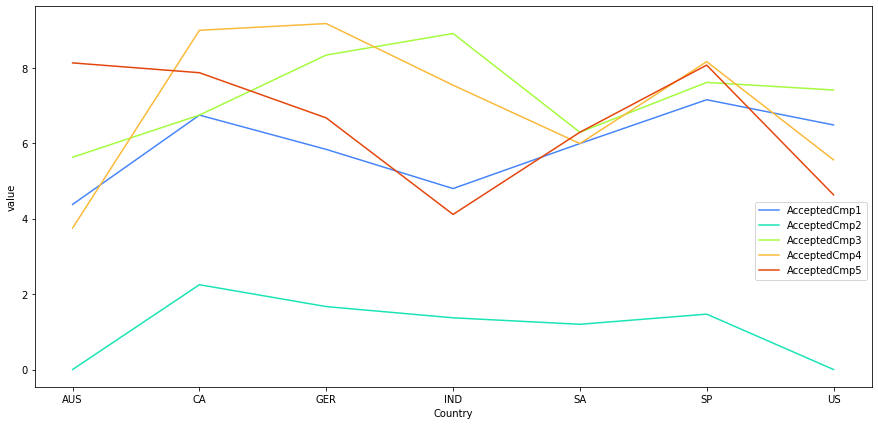

In [62]:
# Visualizing the success of campaigns among all the countries
plt.figure(figsize = (15, 7))
ax = sns.lineplot(x = 'Country', y = 'value', hue = 'variable', data = geo, palette = 'turbo')
ax.legend(loc = 'best', bbox_to_anchor = (1, 0.5))

There seems to be **no relation** between geographical region and success of a campaign. Although we can say that campaign 2 had the worst results among all campaigns.

## Data Visualization

### 1) Most successful marketing campaign

Text(0.5, 1.0, 'Marketing campaign success rate')

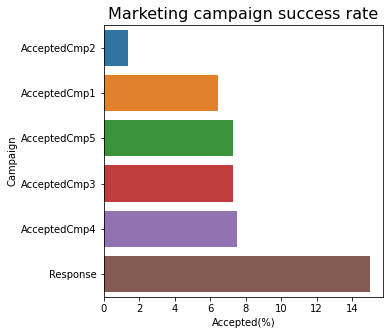

In [63]:
# Calculating marketing campaign success rate
camp_success = pd.DataFrame(df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].mean() * 100, columns = ['Percent']).reset_index()

# Barplot visualization
plt.figure(figsize = (5, 5))
sns.barplot(x = 'Percent', y = 'index', data = camp_success.sort_values('Percent'));
plt.xlabel('Accepted(%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size = 16)

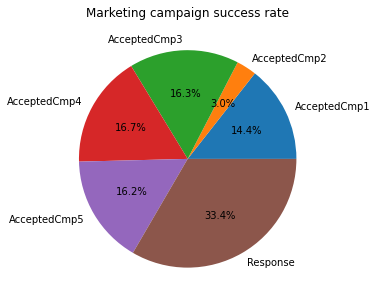

In [64]:
# Pieplot visualization
plt.figure(figsize = (5, 5))
plt.pie(camp_success['Percent'], labels = camp_success['index'], autopct="%0.1f%%")
plt.title('Marketing campaign success rate')
plt.show()

The most successful campaign is the most recent campaign ('Response').

### 2) The average customers look like to the company

In [65]:
# Lists of columns with binary responses
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

# Lists of columns for spending
mnt_cols = [col for col in df.columns if 'Mnt' in col]

# Lists of columns for channels
channel_cols = [col for col in df.columns if 'Num' in col]

In [66]:
# Average customer demographics
demographics = pd.DataFrame(round(df.drop(columns = binary_cols + mnt_cols + channel_cols).mean(),1),columns=['Average']).reindex(['Age', 'TotalEnrollDays', 'Income', 'Children','Kidhome','Teenhome', 'Recency'])
demographics

,Average
Age,52.1
TotalEnrollDays,3068.8
Income,51619.5
Children,1.0
Kidhome,0.4
Teenhome,0.5
Recency,49.1


In [67]:
# Calculating percentage of customers from a particular country
country = ((df['Country'].value_counts()/df['Country'].value_counts().sum()) * 100).reset_index()

# Calculating percentage of customers from a particular educagtional background
education = ((df['Education'].value_counts()/df['Education'].value_counts().sum()) * 100).reset_index()

# Calculating percentage of customers based on their marital_status
marital_status = ((df['Marital_Status'].value_counts()/df['Marital_Status'].value_counts().sum()) * 100).reset_index()

# Calculating percentage of customers based on the number of their chideren (kid(s) + teen(s))
children = ((df['Children'].value_counts()/df['Children'].value_counts().sum()) * 100).reset_index()

**Visualization of the distribution of the customers based on categorical features**

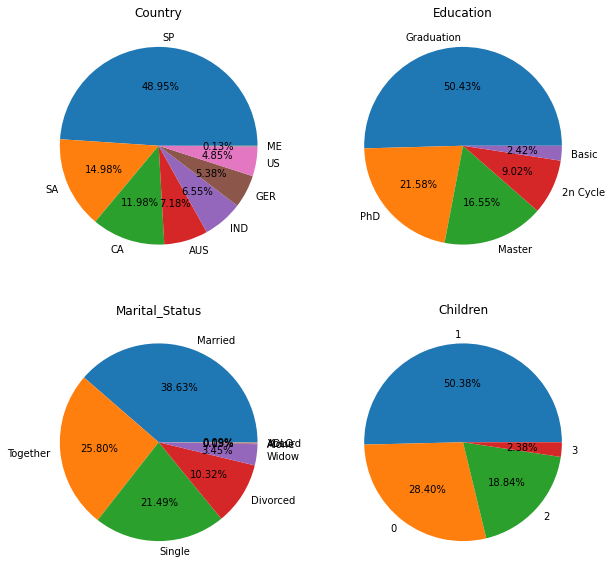

In [68]:
plt.figure(figsize = (10, 10))

plt.subplot(221)
plt.pie(country['Country'], labels = country['index'], autopct="%0.2f%%")
plt.title('Country')

plt.subplot(222)
plt.pie(education['Education'], labels = education['index'], autopct="%0.2f%%")
plt.title('Education')

plt.subplot(223)
plt.pie(marital_status['Marital_Status'], labels = marital_status['index'], autopct="%0.2f%%")
plt.title('Marital_Status')

plt.subplot(224)
plt.pie(children['Children'], labels = children['index'], autopct="%0.2f%%")
plt.title('Children')

plt.show()

**The average customer :-**

- Belongs to Spain (SP)
- Is Graduated
- Is married
- Has at least a child
- Has age 52
- Has an income of about 50k

### 3) Best Performing Products

Text(0.5, 1.0, 'Amount Spent on Various Products')

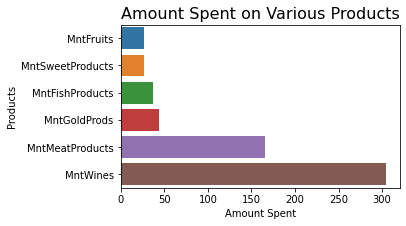

In [69]:
# Calculating the average amount spend on different products purchased
products = pd.DataFrame(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean(), columns = ['Amount Spent']).reset_index()

# Barplot visualization
plt.figure(figsize = (5, 3))
sns.barplot(x = 'Amount Spent', y = 'index', data = products.sort_values('Amount Spent'));
plt.xlabel('Amount Spent')
plt.ylabel('Products')
plt.title('Amount Spent on Various Products', size = 16)

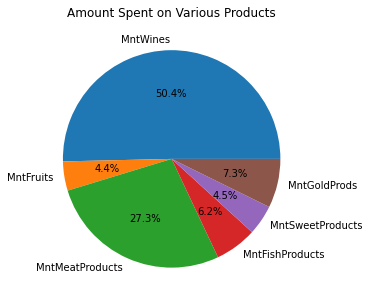

In [70]:
# Pieplot visualization
plt.figure(figsize = (5, 5))
plt.pie(products['Amount Spent'], labels = products['index'], autopct="%0.1f%%")
plt.title('Amount Spent on Various Products')
plt.show()

**The average customer spent:-**
- \\$25-50 on Fruits, Sweets, Fish, or Gold products
- Over \\$160 on Meat products
- Over \\$300 on Wines  
  
**Wine** is the best performing product in terms of revenue and revenue per customer followed by **meat**. Wine contributes to ~50% of the total revenues. 

### 4) Underperforming Channels

Text(0.5, 1.0, 'Number of purchases made through different channels')

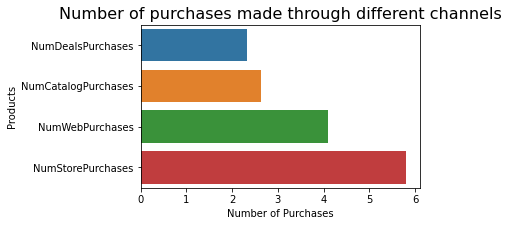

In [71]:
# Calculating the number of purchases made through different channels
channels = pd.DataFrame(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean(), columns = ['NumPurch']).reset_index()

# Barplot visualization
plt.figure(figsize = (5, 3))
sns.barplot(x = 'NumPurch', y = 'index', data = channels.sort_values('NumPurch'));
plt.xlabel('Number of Purchases')
plt.ylabel('Products')
plt.title('Number of purchases made through different channels', size = 16)

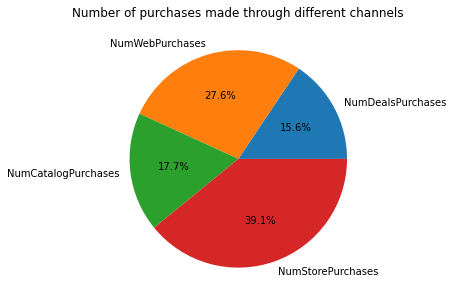

In [72]:
# Pieplot visualization
plt.figure(figsize = (5, 5))
plt.pie(channels['NumPurch'], labels = channels['index'], autopct="%0.1f%%")
plt.title('Number of purchases made through different channels')
plt.show()

**The average customer made:-**
- 2 deals purchases
- 2 catalog purchases
- 4 web purchases and
- 5 store purchases

**Deals purchases** is underperforming channel followed by **catalog purchases**. This needs to be investigated further to check it's viability and the factors that are dragging it down.

## Pre-Processing

Removing columns which do not provide important information to segment the customers or have only a single value.

In [73]:
df_seg = df.drop(columns=['ID', 'Recency', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Country'])
df_seg

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,TotalEnrollDays,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Children,TotalMnt,TotalPurchase,TotalCampaignsAcc
0,51,Graduation,Divorced,84835.0,0,0,2728,189,104,379,...,1,4,4,6,1,0,0,1190,15,1
1,60,Graduation,Single,57091.0,0,0,2729,464,5,64,...,1,7,3,7,5,0,0,577,18,2
2,63,Graduation,Married,67267.0,0,1,2762,134,11,59,...,1,3,2,5,2,0,1,251,11,0
3,54,Graduation,Together,32474.0,1,1,2764,10,0,1,...,1,1,0,2,7,0,2,11,4,0
4,32,Graduation,Single,21474.0,1,0,2797,6,16,24,...,2,3,1,2,7,0,1,91,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,45,PhD,Divorced,66476.0,0,1,3194,372,18,126,...,2,5,2,11,4,0,1,689,20,0
2236,44,2n Cycle,Married,31056.0,1,0,3238,5,10,13,...,1,1,0,3,8,0,1,55,5,0
2237,45,Graduation,Divorced,46310.0,1,0,3288,185,2,88,...,2,6,1,5,8,0,1,309,14,0
2238,43,Graduation,Married,65819.0,0,0,3292,267,38,701,...,1,5,4,10,3,0,0,1383,20,0


Pre-processing the data using Label Encoder

In [74]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
for i in ['Education', 'Marital_Status']:
    df_seg[i] = df_seg[[i]].apply(encode.fit_transform)

Scaling is essential before performing clustering. 

In [75]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit_transform(df_seg.values)
scaled_df = pd.DataFrame(scale, index = df_seg.index, columns = df_seg.columns)

## Unsupervised Learning (Clustering)
**Segmentation of the customers based on their personalities.**

### Implementing K-Means Clustering

In [76]:
# Importing K-Means
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

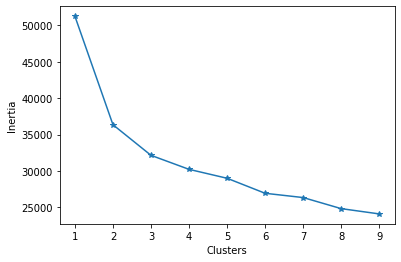

In [77]:
## Plotting classic elbow graph
plt.plot(range(1, 10), inertia, marker = '*')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

Using the classic elbow method for KMeans, the best cluster looks to be **3**.

Some of the following codes which employs **yellowbrick** library is being motivated from https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [78]:
! pip install yellowbrick

You should consider upgrading via the 'c:\users\shraddha\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


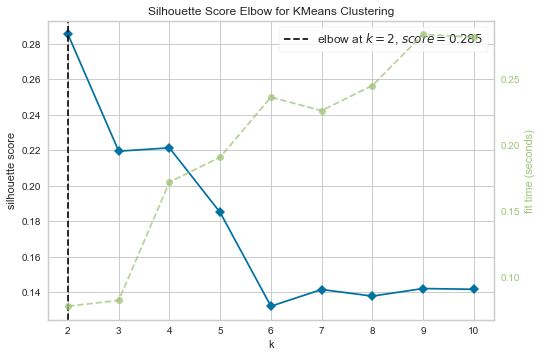

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [79]:
# Importing KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

# Implementing 'Silhouette Score'
# Instantiate the clustering model and visualizer
Elbow_M = KElbowVisualizer(KMeans(init = 'k-means++'), k=10, metric='silhouette')

# Fit the data to the visualizer
Elbow_M.fit(scaled_df)

# Finalize and render the figure
Elbow_M.show()

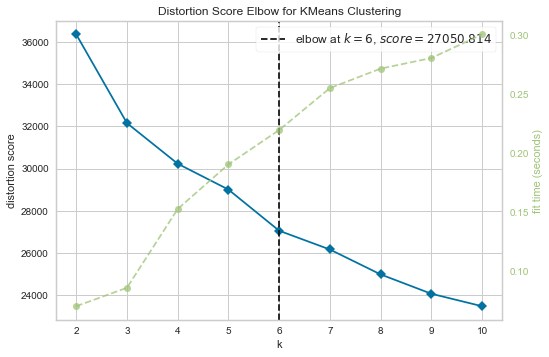

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
# Implementing 'Distribution Score'
Elbow_M = KElbowVisualizer(KMeans(init = 'k-means++'), k=10, metric='distortion')
Elbow_M.fit(scaled_df)
Elbow_M.show()

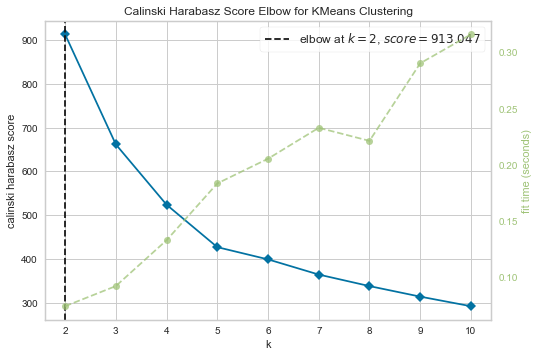

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [81]:
# Implementing 'Calinski Harabasz Score'
Elbow_M = KElbowVisualizer(KMeans(init = 'k-means++'), k=10, metric='calinski_harabasz')
Elbow_M.fit(scaled_df)
Elbow_M.show()

Based on the different metrics, number of clusters selected are :

- Inertia - 3 (Selected based on the plot)
- Silhouette - 2
- Distortion - 4 
- Calinski Harabasz -2

Proceeding with 3 as it would capture the 3 segments of the population based on income i.e. lower, middle and higher.

### Model Building

In [82]:
# Clustering the Scaled Dataframe
kmeans = KMeans(n_clusters = 3, init = 'k-means++').fit(scaled_df)
pred = kmeans.predict(scaled_df)

In [83]:
# Total Data Points in a particular cluster
df_seg['Cluster'] = pred + 1
df_seg['Cluster'].value_counts()

3    1048
2     617
1     564
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='TotalMnt'>

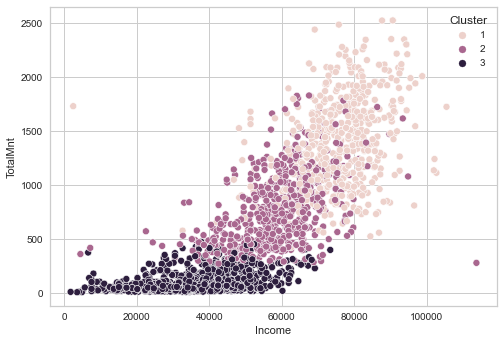

In [84]:
# Scatterplot Visualization of the clusters
sns.scatterplot(x = 'Income', y = 'TotalMnt', hue='Cluster', data = df_seg)

The following code which employs **seaborn.FacetGrid** is being motivated from https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

**FacetGrid** is the multi-plot grid for plotting conditional relationship

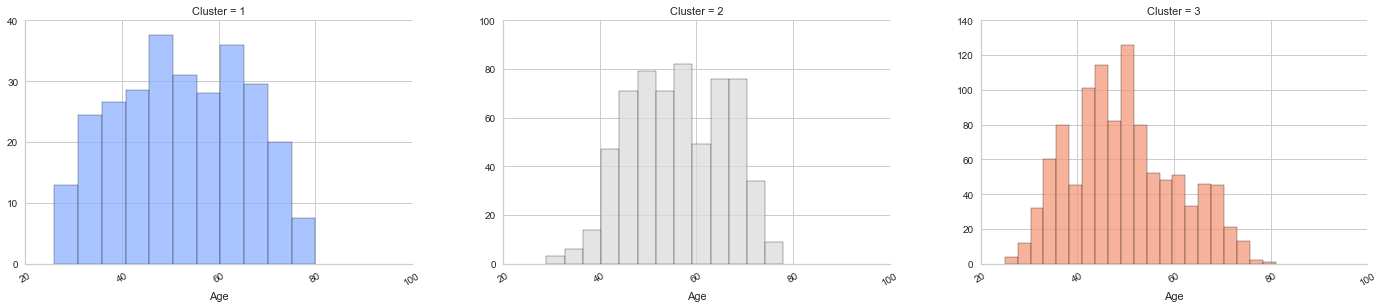

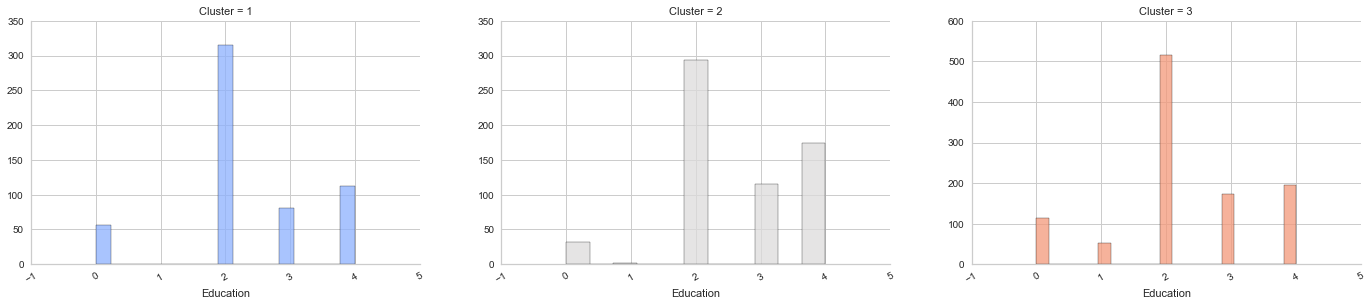

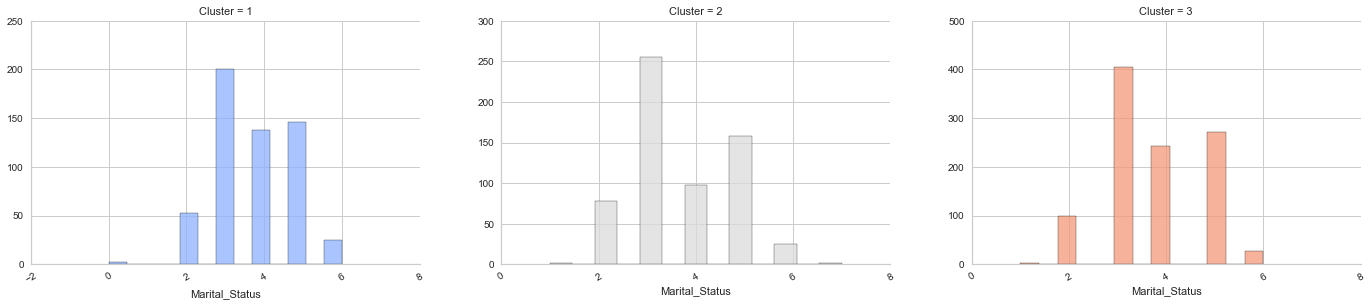

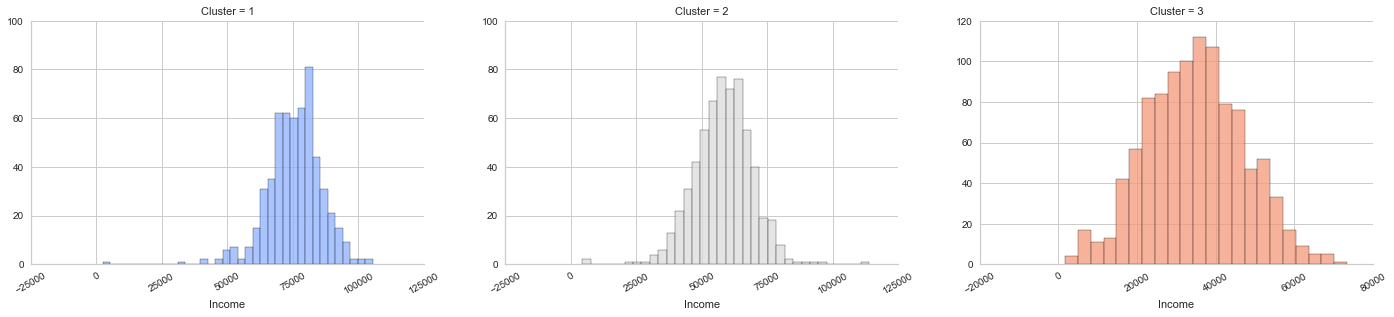

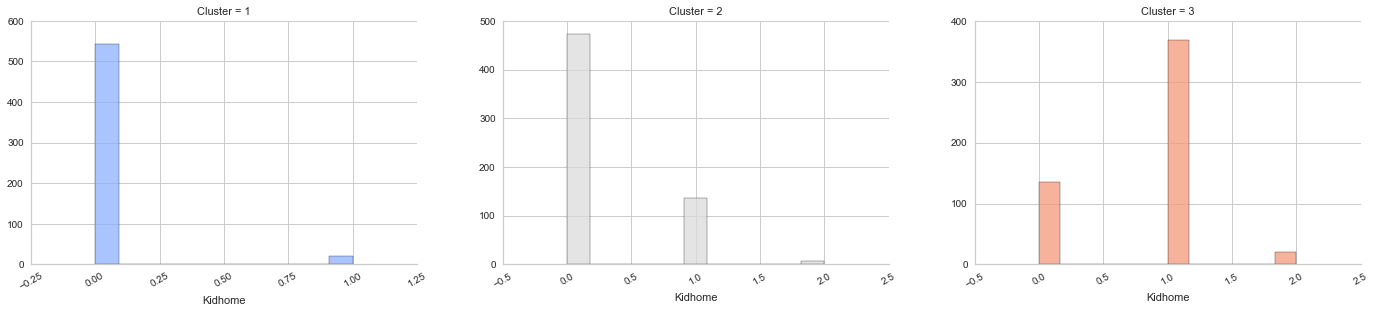

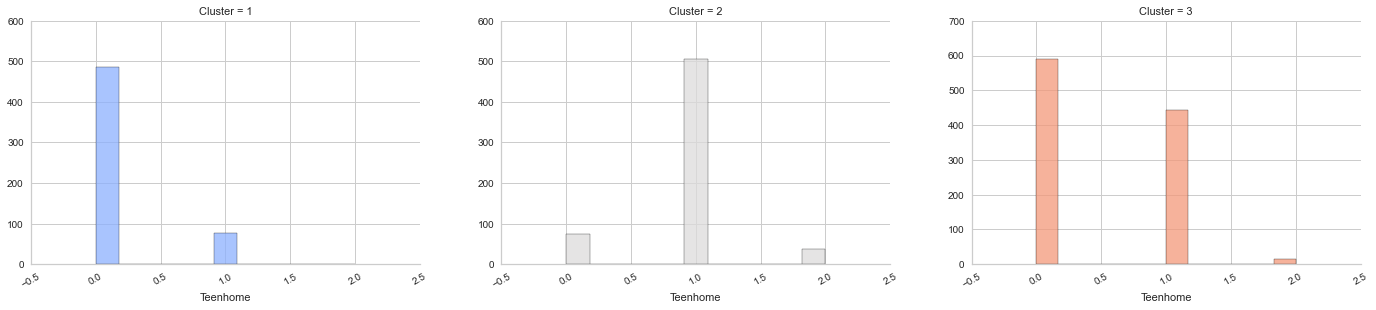

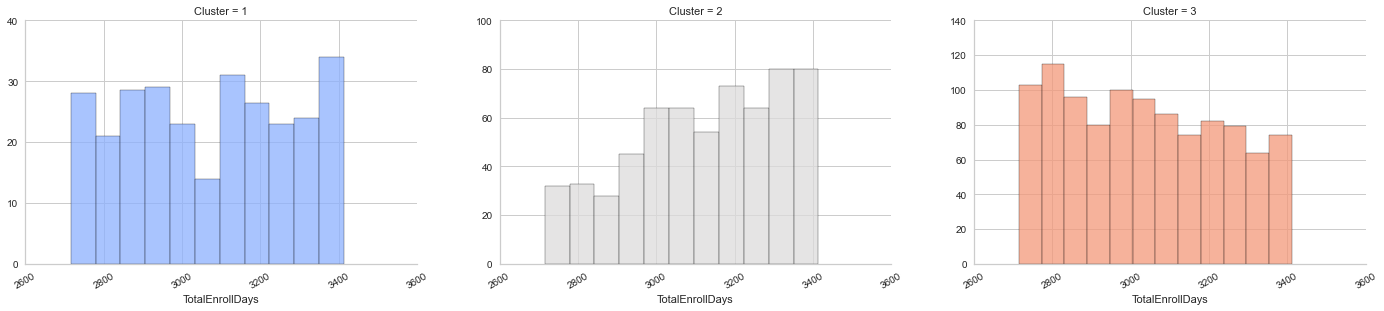

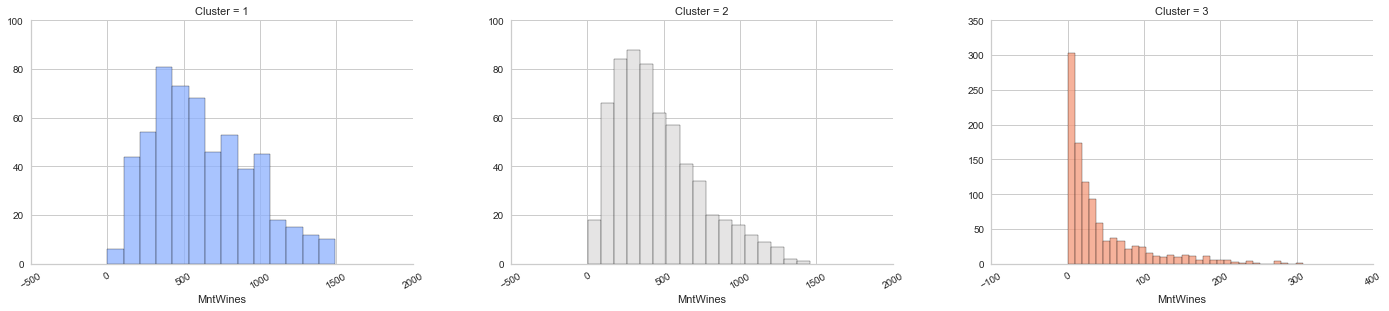

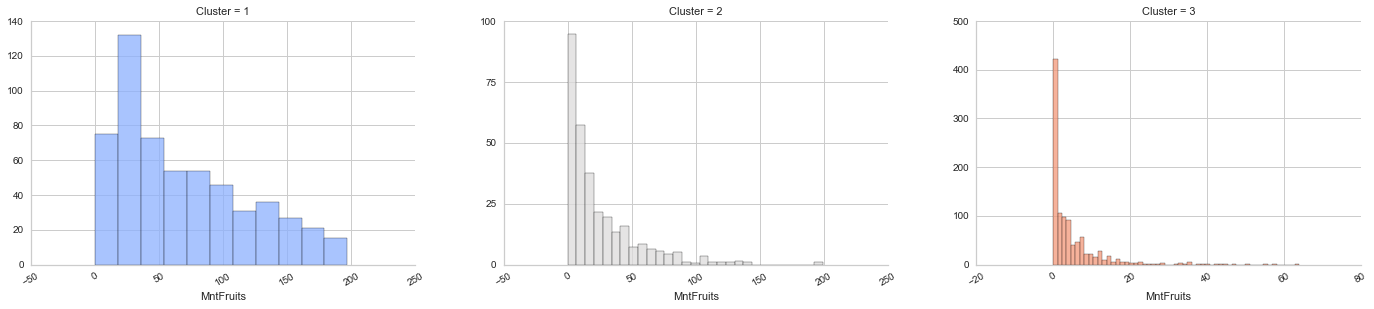

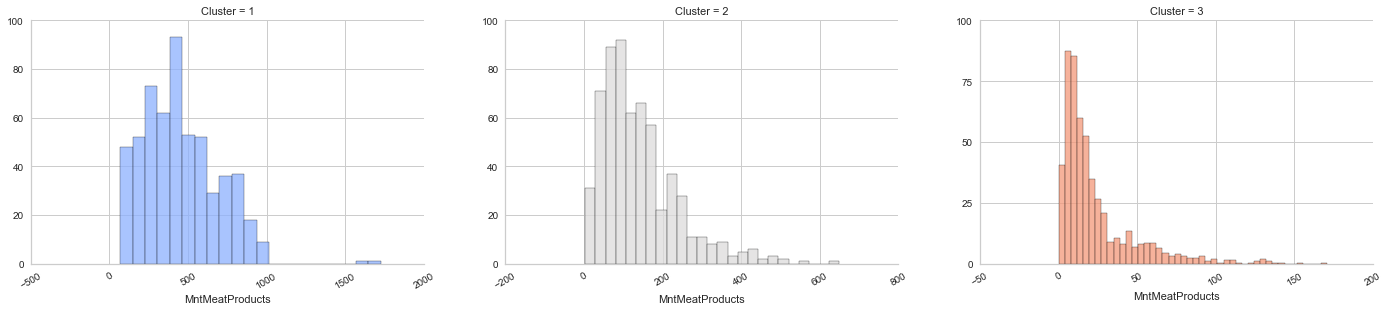

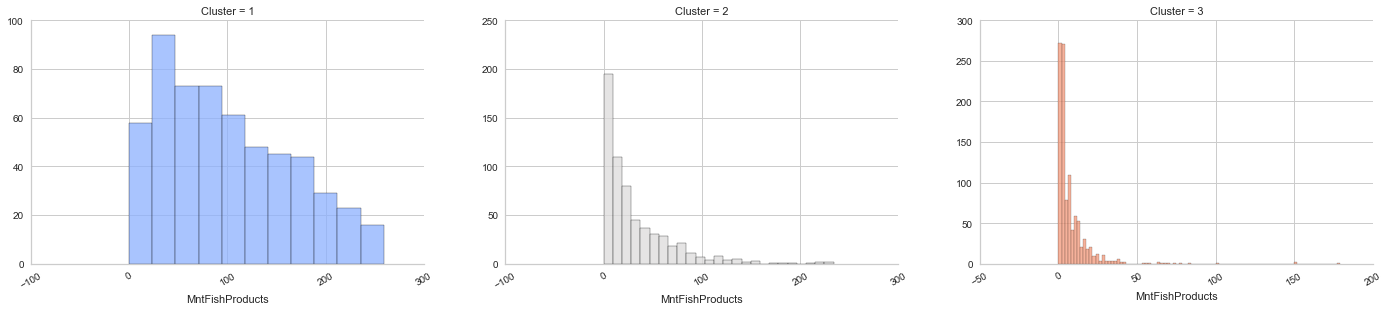

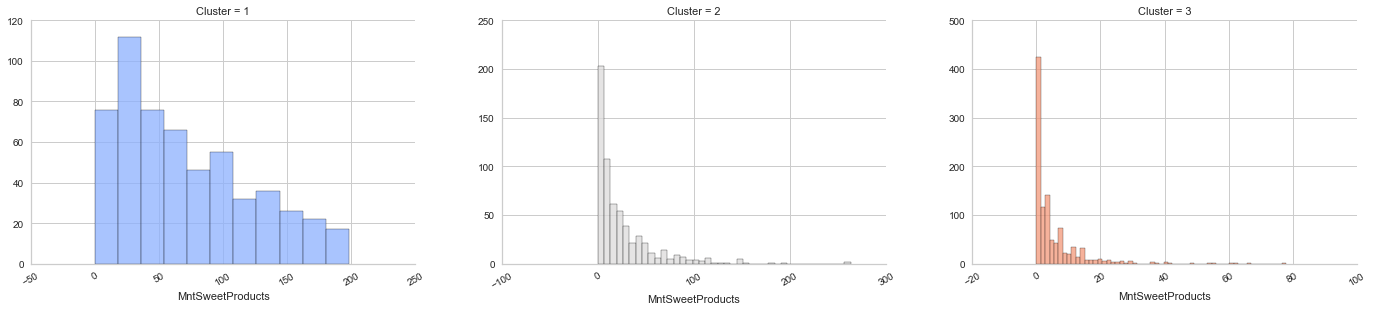

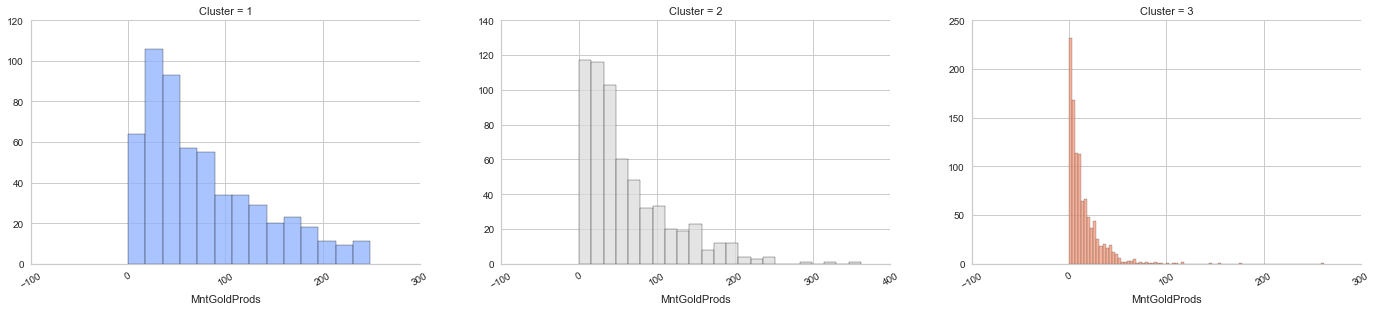

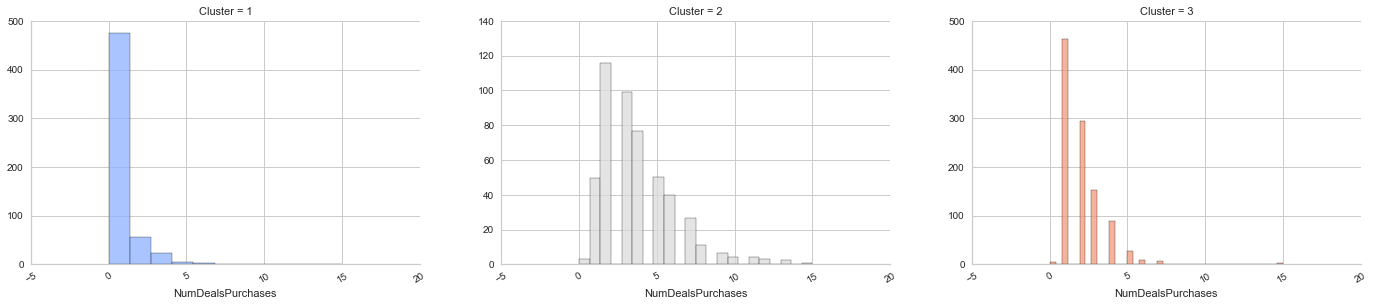

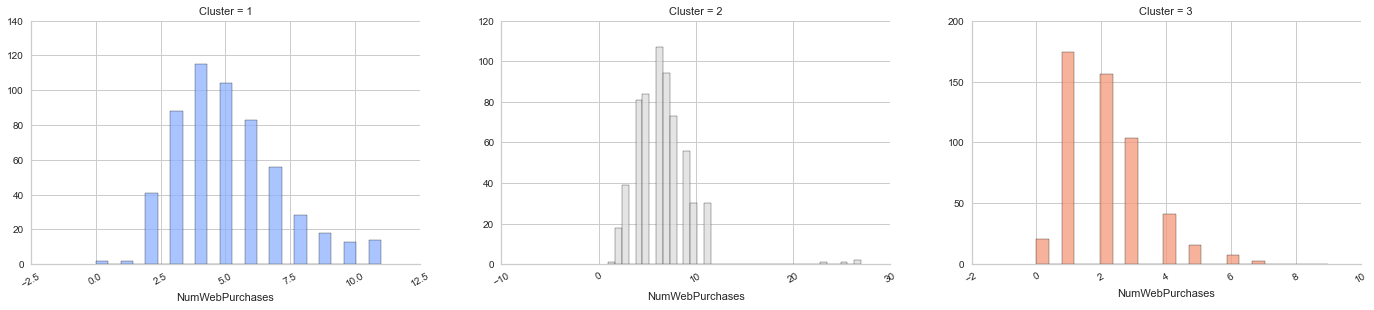

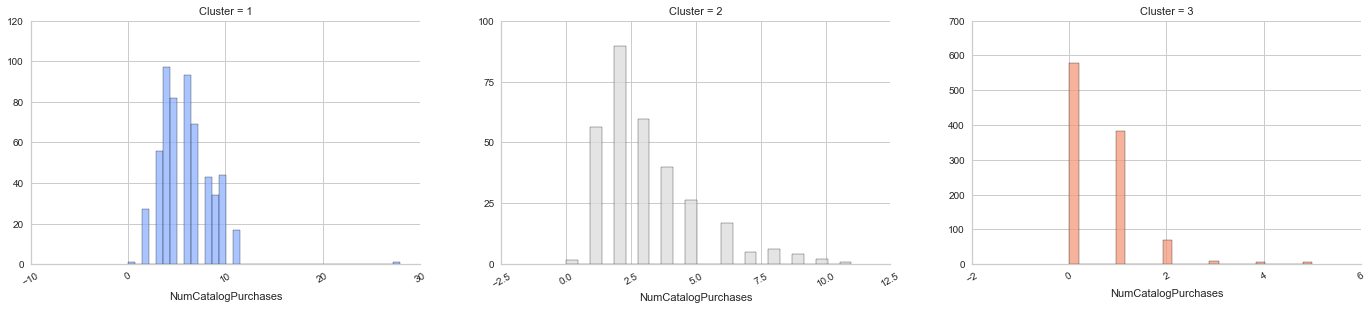

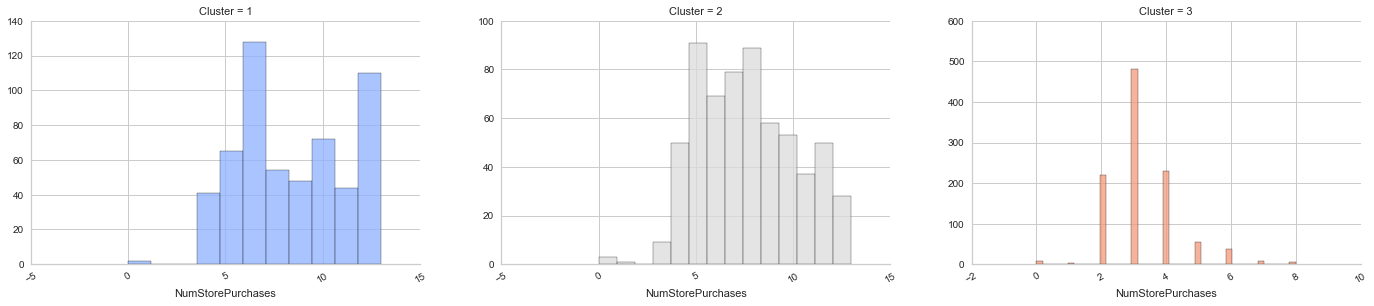

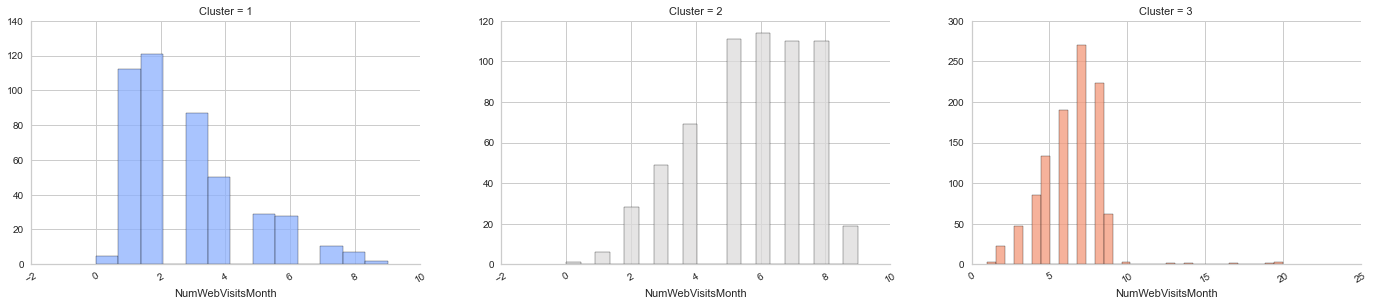

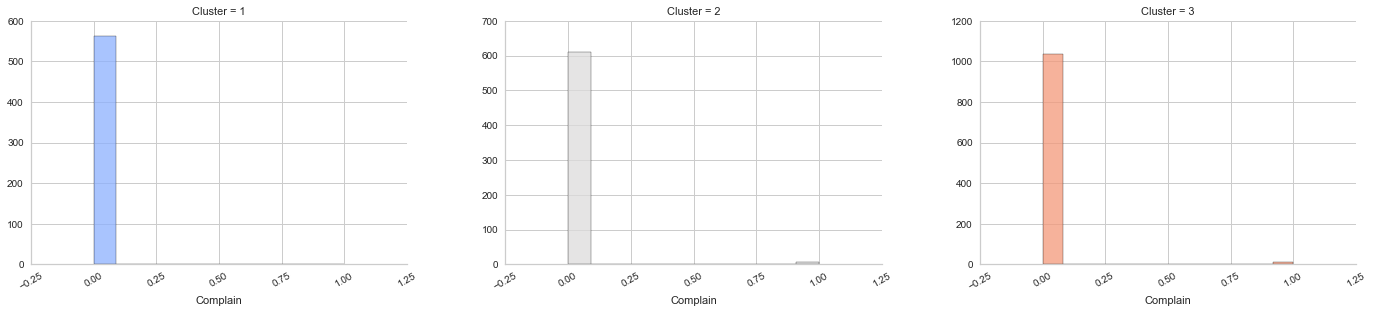

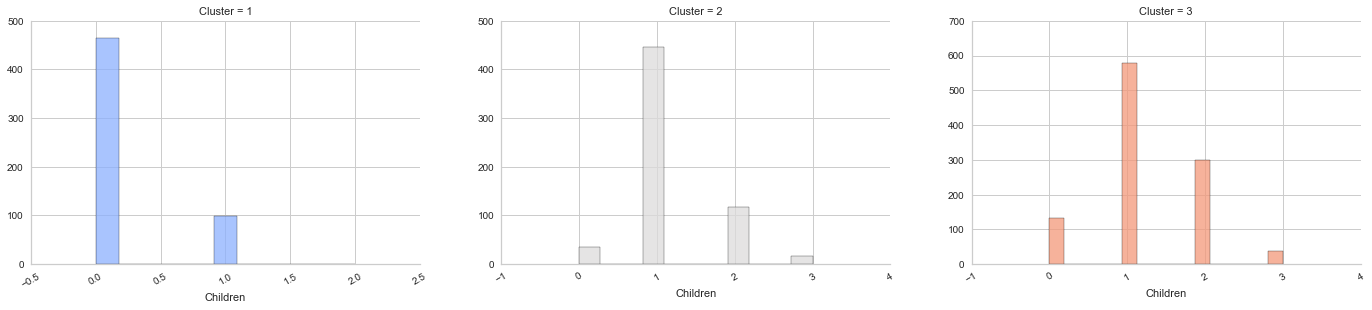

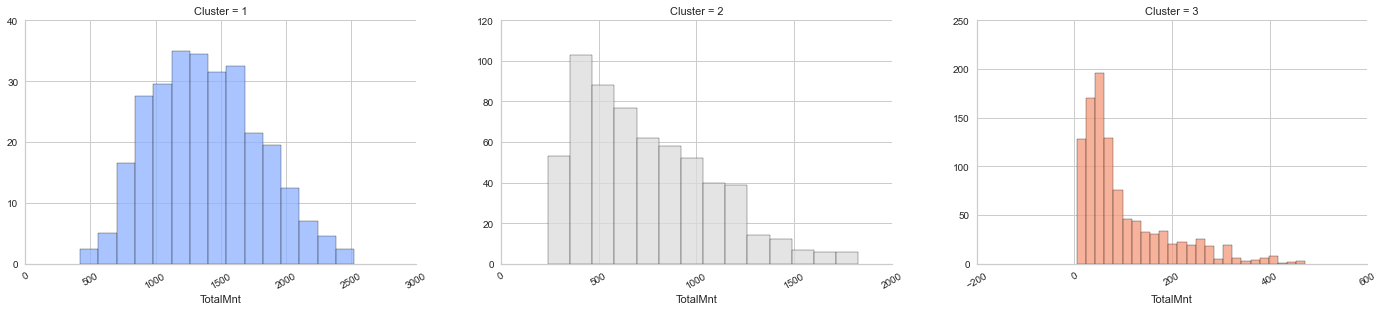

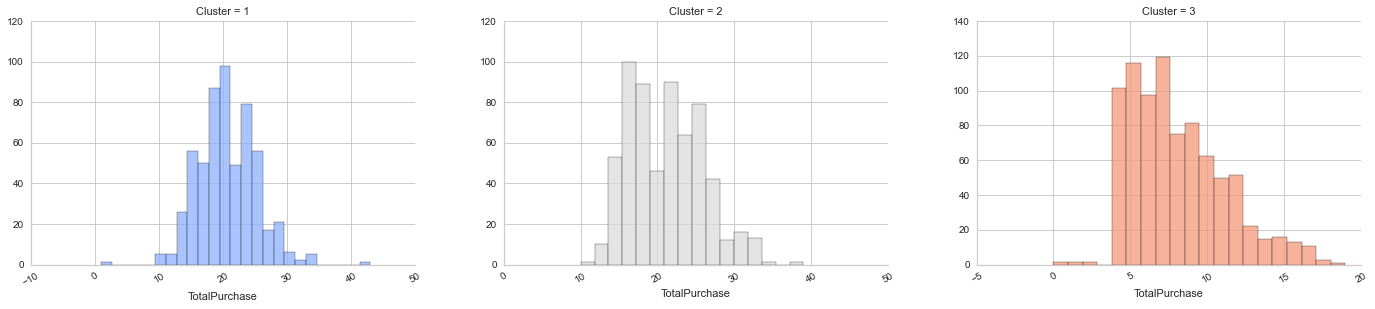

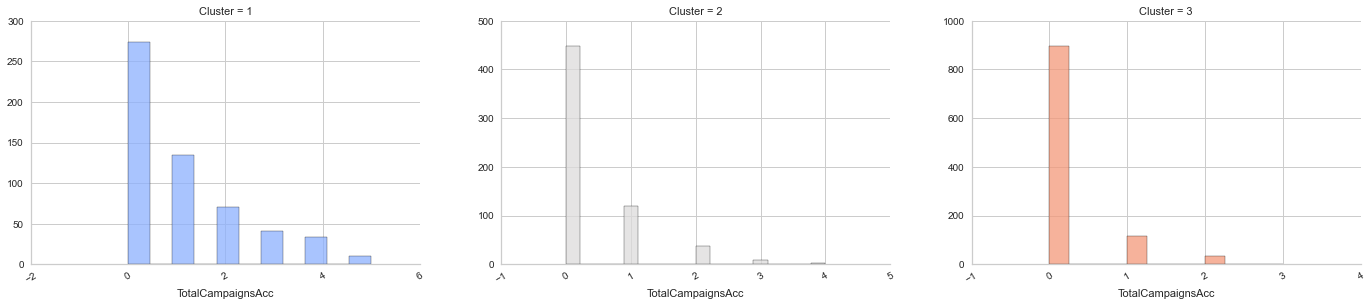

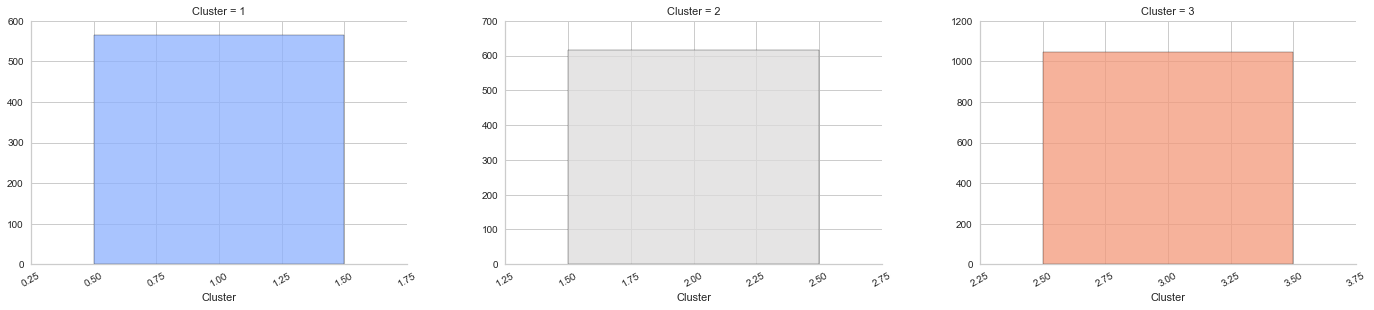

In [85]:
# Plotting FacedGrid to visualize the clustering of customers
for i in df_seg:
    fg = sns.FacetGrid(df_seg, col = "Cluster", hue = "Cluster", palette = "coolwarm",sharey=False,sharex=False)
    fg.map(sns.histplot, i) 
    fg.set_xticklabels(rotation = 30)
    fg.set_yticklabels()
    fg.fig.set_figheight(5)
    fg.fig.set_figwidth(20)

**Observations drawn from these plots**  
There are a number of similarities across certain attributes but the key ones which help distinguish these clusters from one another have been summarised as follows:-

Cluster 1 includes those customers who have **high income**.

- Majority of them have no kids.
- This group has higher expenses and it is evident from the fact that they earn the most.
- As far as the products are concerned, there is nothing that stands out which tells whether the group as a whole prefer a certain product more or less.
- The cluster prefers to make catalog purchases and has the least deal purchases.
- Based on the previous 5 marketing campaigns, the highest success rate has come from this group.

Cluster 2 includes those customers who have **moderate income**.

- Majority have at least 1 child. (Child = Kid(s) + Teen(s))
- The group has a significant affinity to wine products.
- This cluster has the highest number of people.

Cluster 3 includes those customers who have **lower income**.

- Customers with Basic education are found in this group only.
- Due to lower income, the expenses in absolute terms is also the least here.
- The group prefers to spend more on fruits, meat and fish and less on wine.
- The preferred channel to purchases products here is through stores.
- Majority of campaigns have failed to attract this group. The success rate is the lowest.

## Recommendations after the Analysis

**Conclusion 1:** The most successful advertising campaign was the most recent campaign.  
**Recommendation:** Conduct future advertising campaigns using the same model recently implemented.
  
**Conclusion 2:** The highest performing products are wines and meats.  
**Recommendation:** Focus advertising campaigns on boosting sales of the less popular items.
  
**Conclusion 3:** The best performing channels are web and store purchases while the underperforming channels are deals and catalog purchases.  
**Recommendation:** Focus advertising campaigns on the more successful channels to reach more customers.  
  
**Conclusion 4:** Married customers who have done graduation purchaased high number of fish products.  
**Recommendation:** Marketing fish products to married people who have an education level at or above graduation is recommended.
  
**Conclusion 5:** Amount spend on wine tend to increase store purchasing.  
**Recommendation:** Making wine more accessible will increase sales in store.

**Conclusion 6:** Advertising campaigns have failed to attract the customers having lower income.  
**Recommendation:** Focus advertising campaigns to target lower and moderate income customers by providing them with special discounts as these clusters have the greatest number of people.